
# Pipeline for creating snippets


In [ ]:
import pandas as pd
import numpy as np
import difflib as dif 
import glob, os
from tqdm import tqdm
#State the main folder to read the files is located here
os.chdir(r"C:\Users\demon\Documents\Maestria y Papeles Alemania\ResearchProject\datos\Data")
timeseries = glob.glob("*.txt")
events = glob.glob("*.trg")
import pandas as pd
import numpy as np
import difflib as dif 
import glob, os
from tqdm import tqdm
import matplotlib.pyplot as plt




Two class labeling

In [ ]:
def gw(typ):
  cl = np.empty_like(typ)
  for  i in range(len(typ)):
      #Classified as good 
      if typ.iloc[i] == "u":
        cl[i] ="g"
      #Classified as wrong or bad
      else: 
        cl[i]="w"
  return cl

In [ ]:
def Stress(dataset,stamp,typ,cl):
  #stress
  #Padding.. The padding part depend on thes w data type since 
  uppad = pd.DataFrame(np.zeros((25, dataset.shape[1])),columns=dataset.columns)
  downpad = pd.DataFrame(np.zeros((100, dataset.shape[1])),columns=dataset.columns)

  # d is the dictionary containing all the snippets 
  d = {}
  for i in range(len(stamp)):
    #Multiply by the frequency to get the time 
    a = round(stamp.iloc[i]*250)
    # Minus 100 ms... 4ms times 25 point 
    b = a - 25 
    # Plus 1200 ms.... 4ms times 300 points 
    c = a + 300
    #Creating the frames 
    d[i,typ.iloc[i],cl[i]] = dataset.iloc[b:c]
    d[i,typ.iloc[i],cl[i]] = uppad.append(d[i,typ.iloc[i],cl[i]])
    d[i,typ.iloc[i],cl[i]] = d[i,typ.iloc[i],cl[i]].append(downpad)
  
  return d

def Vowel(dataset,stamp,typ,cl):
  #Vowel
  downpad = pd.DataFrame(np.zeros((250, dataset.shape[1])),columns=dataset.columns)
  d = {}
  
  for i in range(len(stamp)):
    #Multiply by the frequency to get the time 
    a = round(stamp.iloc[i]*250)
    # Minus 200 ms
    b = a - 50 
    # Plus 600 ms
    c = a + 150
    #Creating the frames 
    d[i,typ.iloc[i],cl[i]] = dataset.iloc[b:c]
    d[i,typ.iloc[i],cl[i]] = d[i,typ.iloc[i],cl[i]].append(downpad) 
  return d

def Lex(dataset,stamp,typ,cl):
  #lexicon
  d = {}
  for i in range(len(stamp)):
    #Multiply by the frequency to get the time //  This in the lexicon trials is modify to be 500 HZ , we dont take 
    a = round(stamp.iloc[i]*500)
    # Minus 200 ms
    b = a - 100 
    # Plus 1600 ms
    c = a + 800
    #Frame 
    bc = dataset.iloc[b:c]
    ind =  np.arange(len(bc))
    #Finding half of the elements in an array base on the frequency adquistion 
    rightones = np.where(ind % 2 == 0)
    #Selecting a list of indexes and creating the frames 
    d[i,typ.iloc[i],cl[i]] = bc.iloc[rightones[0]]
  return d
  

In [ ]:
def dataprocess(name,dataset,trgdata):
  # Drop Non existing classification from the 4th columns as indicated in the word file // Search columwise if the is a non existing value if there is not drops the whole row from the data set 
  trg  =  trgdata.dropna(subset = [trgdata.columns[3]] )
  #Column with the  time events
  stamp = trg.iloc[:,0]
  #Type of events containing b,m,u,r 
  typ = trg.iloc[:,4]
  #Good or bad event classification
  #Creating the class good or bad corresponding to each event
  cl = gw(typ)
  #global dataf

  #Selecting the type of file that we want to find   
  if name[0] == 's':
    snip = Stress(dataset,stamp,typ,cl)
  
  if name[0] == 'v':
    snip = Vowel(dataset,stamp,typ,cl)
  
  if name[0] == 'n':
    snip = Lex(dataset,stamp,typ,cl)

  if name[0] == 'c' and name[1] == 's':
    snip = Stress(dataset,stamp,typ,cl)

  if name[0] == 'c' and name[1] !='s':
    snip = Vowel(dataset,stamp,typ,cl)

  
  # datain = pd.concat(snip,axis = 0)
  # dataf = dataf.append(datain)

  for key,value in snip.items():

    # t = np.array(value)
    # t = np.expand_dims(t, axis=0)
    # #print(t.shape)
    
    # Different Classes 
    # if key[1] == 'u':
    #   k =  np.array([0])
    # elif key[1] == 'r':
    #   k =  np.array([1])
    # elif key[1] == 'm':
    #   k =  np.array([2])
    # elif key[1] == 'b':
    #   k =  np.array([3])

    # #Two Classes 
    # if key[2] == 'g':
    #   to = np.array([1])
    # else:
    #   to = np.array([0])

    # target2.extend(k.tolist())  
    # target.extend(to.tolist())
    # datafinal.extend(t.tolist())
      snames.append(name)
    
    #f = np.array(datafinal)
    #f1= np.array(target)
    #print(f1.shape)
    #print(f.shape)
  return snames



This is the part where all the big dataset for the CNN is created


In [ ]:

#Beautiful part hahaha just to match the code of the first document .txt with the .trg file and found the one that corresponds  took a me 1 hour
datafinal = []
target = []
target2 = []
snames = []
for i in tqdm(range(len(timeseries))):
      dataset=pd.read_csv(timeseries[i])
      if dataset.shape[1] == 11:
        #Arange all the EEG channels in the same order
        dataset = dataset[sorted(list(dataset))]
        #Find the trg file that looks mode likely 
        m1 = dif.get_close_matches(timeseries[i][0:4],events,cutoff=0.4)
        trgdata = pd.read_csv(m1[0],sep ='\s+')
        snames = dataprocess(timeseries[i],dataset,trgdata)
      
        #f = np.array(datafinal)
        #f1 = np.array(target)
        #print(f.shape)
        #print(f1.shape[0])
        #if f.shape[0] > chunksize:
        #  datafinal =[]
        #  target = []
        #  f = np.empty

#print(t.shape)          

#f = np.array(datafinal)
#f1 = np.array(target)      

#print(dataset.shape[1])
#print(m1[0])
#print(timeseries[i])

100%|████████████████████████████████████████████████████████████████████████████████| 188/188 [03:55<00:00,  1.25s/it]


In [ ]:
from collections import Counter


Counter(snames).keys() # equals to list(set(words))
Counter(snames).values() # counts the elements' frequency

dict_values([1200, 1199, 1200, 1199, 1200, 1200, 1200, 1092, 1198, 1198, 1199, 1199, 1200, 1200, 1199, 1199, 1198, 1199, 1198, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1200, 1000, 1001, 1001, 1000, 1001, 1001, 1001, 1001, 1001, 1001, 1001, 1000, 1001, 1001, 1000, 1000, 1000, 1001, 1000, 977, 1001, 1001, 1000, 1000, 150, 145, 171, 167, 151, 171, 158, 156, 157, 163, 169, 139, 141, 147, 171, 158, 141, 159, 149, 149, 159, 167, 152, 140, 149, 147, 145, 156, 159, 151, 157, 139, 167, 164, 141, 141, 142, 154, 162, 140, 129, 136, 148, 156, 142, 138, 148, 133, 130, 162, 140, 110, 135, 1002, 1000, 1002, 1001, 1000, 1000, 1001, 999, 1001, 1001, 1000, 1002, 1000, 1002, 1001, 1000, 810, 1000, 1001, 1001, 1000, 1001, 1001, 1001, 1000, 1000, 1000, 843, 1001, 1001, 1001, 1000, 1001, 1000, 868, 654, 1000, 1001, 1001, 1001, 1200, 1001, 1000, 1002, 1000, 842])

In [ ]:
import pickle
with open('snippetfiles.txt', 'wb') as fp:
    pickle.dump(snames, fp)

In [ ]:
with open('snippetfiles.txt', 'rb') as fp:
    files =  pickle.load(fp)


 **Saving the datasets**

In [ ]:
import h5py
import numpy as np


In [ ]:
with h5py.File("datafinal.h5",'w') as f:
    # create a dataset for your movie
    dst = f.create_dataset("EEG", shape=(109463, 450, 11),
                           dtype=np.float)
    # fill the 10 frames with a random image
    for frame in range(len(df)):
        dst[frame] = df[frame]

In [ ]:
np.savez("namefiles", filesn)

In [ ]:
with h5py.File("multiclass=.h5",'w') as f:
    # create a dataset for your movie
    dst = f.create_dataset("class", shape=(109463,),
                           dtype=np.float)
    # fill the 10 frames with a random image
    for frame in range(len(tf)):
        dst[frame] = tf[frame]

In [ ]:
with open("file.txt", "w") as f:
    for s in score:
        f.write(str(s) +"\n")

**Testing Code**

In [ ]:
count =0
for i in range(len(timeseries)):
  
  m1 = dif.get_close_matches(timeseries[i][0:4],events,cutoff=0.3)
  #print(timeseries[i]) 
  #print(m1[0])
  if timeseries[i][0:4] == m1[0][0:4]:
    count +=1

print(count)

How to read hdf5 files 


In [ ]:
import h5py
filename = "datos.h5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])

In [ ]:
import h5py

with h5py.File(r"salida.h5", "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    wayu = list(f[a_group_key])

In [ ]:
values, counts = np.unique(target, return_counts=True)
values, counts = np.unique(target, return_counts=True)


# Indiviualdatasets

This part was done to read the dataset and test how to separate de snippets integration of the code and the different snippets types is above

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [ ]:
#pd.set_option('max_rows',None)
#pd.set_option('max_columns',None)
dataset=pd.read_csv('/content/drive/MyDrive/ResearchProject/Example/s203_csv_floating.txt')
trgdata = pd.read_csv('/content/drive/MyDrive/ResearchProject/Example/xeog_1-15_rev.trg',sep ='\s+')

It is important to consider that the sample frequency is 250 Hz and each 
4 ms a measument is taken

In [ ]:
a = dataset.shape[0]/500
print(a)
# Downsample to 256 Hz 


b = dataset.shape[0]/250
#print(b)

r  = b * 250
#print(r)

900.922


In [ ]:
#pd.set_option('max_rows',None)
#pd.set_option('max_columns',None)
#print(trgdata)

# Drop Non existing classification from the 4th columns as indicated in the word file // Search columwise if the is a non existing value if there is not drops the whole row from the data set 

trg  =  trgdata.dropna(subset = [trgdata.columns[3]] )

print(trg)

#Column with the  time events
stamp = trg.iloc[:,0]
#Type of events containing b,m,u,r 
typ = trg.iloc[:,4]
#Good or bad event classification 

#Time stamps 
print(len(stamp))
values, counts = np.unique(typ, return_counts=True)
print(values)
print(counts)

      0.00400000        40 cls_range -0.100 1.000
3          8.040     82650         6    cls     u
5          9.652     98770         6    cls     u
7         11.260    114850         6    cls     u
9         12.872    130970         6    cls     u
11        14.484    147090         6    cls     u
...          ...       ...       ...    ...   ...
1937    1750.676  17509010        10    cls     r
1939    1752.284  17525090        10    cls     r
1941    1753.896  17541210        10    cls     u
1943    1755.508  17557330        10    cls     u
1945    1757.116  17573410         3    cls     b

[810 rows x 5 columns]
810
['b' 'm' 'r' 'u']
[ 47   6  53 704]


This part separate the time events from the trigger files  and the type
 will separate the type of the event in one columns 

In [ ]:

#Creating the class good or bad corresponding to each event
cl = np.empty_like(typ)

for  i in range(len(typ)):
    #Classified as good 
    if typ.iloc[i] == "u":
      cl[i] ="g"
    #Classified as wrong or bad
    else: 
      cl[i]="w"
  

In [ ]:
values, counts = np.unique(cl, return_counts=True)
print(values)
print(counts)


['g' 'w']
[704 106]


This is the core of the program in example the Streess type is 1300 lenght , as marked in the data structure document is has 1200 ms after the event (equal to 300 points) anif he add 25 zeros in the beginning this will be 100 ms in time series and padding with 100 is equal to 400 ms 

In [ ]:
#stress

#Padding.. The padding part depend on thes w data type since 
uppad = pd.DataFrame(np.zeros((25, 18)),columns=dataset.columns)
downpad = pd.DataFrame(np.zeros((100, 18)),columns=dataset.columns)

# d is the dictionary containing all the snippets 
d = {}
for i in range(len(stamp)):
  #Multiply by the frequency to get the time 
  a = round(stamp.iloc[i]*250)
  # Minus 100 ms... 4ms times 25 point 
  b = a - 25 
  # Plus 1200 ms.... 4ms times 300 points 
  c = a + 300
  arrayin = [i,typ.iloc[i],cl[i]]
  tuples = list(arrayin)
  a = pd.MultiIndex.from_tuples([tuples],names = ['fi','fo','fa'])
  
  dc = pd.DataFrame(dataset.iloc[b:c])
  #Creating the frames 
  d['name',typ.iloc[i],cl[i]] = dataset.iloc[b:c]
  d['name',typ.iloc[i],cl[i]] = uppad.append(d['name',typ.iloc[i],cl[i]])
  d['name',typ.iloc[i],cl[i]] = d['name',typ.iloc[i],cl[i]].append(downpad)

In [ ]:
values = []
keys = []

for k, v in d.items():
  keys.append(k)
  values.append(v)
values = pd.concat(values,axis = 0)



In [ ]:
df = pd.concat(d,axis = 0)

In [ ]:
df.index[

SyntaxError: ignored

In [ ]:
index = pd.DataFrame(df.index)

In [ ]:
index

,0
0,"(0, u, g, 0)"
1,"(0, u, g, 1)"
2,"(0, u, g, 2)"
3,"(0, u, g, 3)"
4,"(0, u, g, 4)"
...,...
364495,"(809, b, w, 95)"
364496,"(809, b, w, 96)"
364497,"(809, b, w, 97)"
364498,"(809, b, w, 98)"


In [ ]:
values

,V+,V-,VEOG,H+,H-,HEOG,F3,FZ,F4,A1,C3,CZ,C4,A2,P3,PZ,P4,DIGI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
values.shape

(810, 450, 18)

In [ ]:
print(indexs)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [ ]:
array = [indexs,index1,index2]

In [ ]:
tp = list(zip(*array))

In [ ]:
print(tp)

[(0, 'u', 'g'), (1, 'u', 'g'), (2, 'u', 'g'), (3, 'u', 'g'), (4, 'u', 'g'), (5, 'u', 'g'), (6, 'r', 'w'), (7, 'r', 'w'), (8, 'u', 'g'), (9, 'u', 'g'), (10, 'r', 'w'), (11, 'u', 'g'), (12, 'u', 'g'), (13, 'u', 'g'), (14, 'u', 'g'), (15, 'u', 'g'), (16, 'u', 'g'), (17, 'r', 'w'), (18, 'r', 'w'), (19, 'r', 'w'), (20, 'u', 'g'), (21, 'u', 'g'), (22, 'u', 'g'), (23, 'u', 'g'), (24, 'u', 'g'), (25, 'r', 'w'), (26, 'u', 'g'), (27, 'u', 'g'), (28, 'u', 'g'), (29, 'u', 'g'), (30, 'u', 'g'), (31, 'u', 'g'), (32, 'u', 'g'), (33, 'u', 'g'), (34, 'u', 'g'), (35, 'u', 'g'), (36, 'u', 'g'), (37, 'u', 'g'), (38, 'u', 'g'), (39, 'u', 'g'), (40, 'u', 'g'), (41, 'u', 'g'), (42, 'u', 'g'), (43, 'u', 'g'), (44, 'r', 'w'), (45, 'u', 'g'), (46, 'u', 'g'), (47, 'u', 'g'), (48, 'u', 'g'), (49, 'b', 'w'), (50, 'b', 'w'), (51, 'u', 'g'), (52, 'u', 'g'), (53, 'u', 'g'), (54, 'u', 'g'), (55, 'u', 'g'), (56, 'u', 'g'), (57, 'u', 'g'), (58, 'u', 'g'), (59, 'u', 'g'), (60, 'u', 'g'), (61, 'u', 'g'), (62, 'u', 'g'), (

In [ ]:
print(indexf)

[(0, 'u', 'g'), (1, 'u', 'g'), (2, 'u', 'g'), (3, 'u', 'g'), (4, 'u', 'g'), (5, 'u', 'g'), (6, 'r', 'w'), (7, 'r', 'w'), (8, 'u', 'g'), (9, 'u', 'g'), (10, 'r', 'w'), (11, 'u', 'g'), (12, 'u', 'g'), (13, 'u', 'g'), (14, 'u', 'g'), (15, 'u', 'g'), (16, 'u', 'g'), (17, 'r', 'w'), (18, 'r', 'w'), (19, 'r', 'w'), (20, 'u', 'g'), (21, 'u', 'g'), (22, 'u', 'g'), (23, 'u', 'g'), (24, 'u', 'g'), (25, 'r', 'w'), (26, 'u', 'g'), (27, 'u', 'g'), (28, 'u', 'g'), (29, 'u', 'g'), (30, 'u', 'g'), (31, 'u', 'g'), (32, 'u', 'g'), (33, 'u', 'g'), (34, 'u', 'g'), (35, 'u', 'g'), (36, 'u', 'g'), (37, 'u', 'g'), (38, 'u', 'g'), (39, 'u', 'g'), (40, 'u', 'g'), (41, 'u', 'g'), (42, 'u', 'g'), (43, 'u', 'g'), (44, 'r', 'w'), (45, 'u', 'g'), (46, 'u', 'g'), (47, 'u', 'g'), (48, 'u', 'g'), (49, 'b', 'w'), (50, 'b', 'w'), (51, 'u', 'g'), (52, 'u', 'g'), (53, 'u', 'g'), (54, 'u', 'g'), (55, 'u', 'g'), (56, 'u', 'g'), (57, 'u', 'g'), (58, 'u', 'g'), (59, 'u', 'g'), (60, 'u', 'g'), (61, 'u', 'g'), (62, 'u', 'g'), (

In [ ]:
index = pd.DataFrame(indexf,columns = ['snippet','class','two'])

In [ ]:
index

,snippet,class,two
0,0,u,g
1,1,u,g
2,2,u,g
3,3,u,g
4,4,u,g
...,...,...,...
805,805,r,w
806,806,r,w
807,807,u,g
808,808,u,g


In [ ]:
df =  pd.concat([values,index],axis = 0)

TypeError: ignored

In [ ]:
bc = bc.where(bc > -200,-200)
bc = bc.where(bc > 1000,1000)

In [ ]:
bc

,V+,V-,VEOG,H+,H-,HEOG,F3,FZ,F4,A1,C3,CZ,C4,A2,P3,PZ,P4,DIGI
439254,3.218651,-50.425529,53.715706,100.493431,-44.703484,145.268440,-2.932549,-29.325485,-33.617020,17.952919,15.234947,1.215935,-11.873245,-17.952919,30.469894,3.862381,-6.294250,1.0
439255,2.360344,-56.219101,58.579445,103.640556,-45.132637,148.773193,1.716614,-29.468536,-28.181076,18.382072,16.808510,3.004074,-11.944771,-18.382072,29.325485,5.292892,-5.722046,3.0
439256,0.929832,-60.868263,61.798096,106.072426,-45.633316,151.777267,7.009506,-29.039383,-21.743774,18.525124,18.882751,4.720688,-11.801720,-18.525124,28.538704,6.937981,-4.863739,5.0
439257,-0.858307,-64.158440,63.300133,107.932091,-46.062469,154.066086,12.445450,-28.038025,-14.877319,18.310547,21.314621,6.294250,-11.372566,-18.310547,27.966499,8.440018,-4.005432,6.0
439258,-2.717972,-65.732002,63.085556,109.148026,-46.277046,155.425072,17.666817,-26.607513,-7.939339,17.738342,23.889542,7.581711,-10.871887,-17.738342,27.465820,9.727478,-3.361702,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439574,29.253960,-60.868263,90.122223,-2.288818,-3.075600,0.715256,-34.403801,-43.487549,-7.081032,6.937981,6.508827,-12.874603,-16.808510,-6.937981,-4.792213,-6.937981,-32.687187,-13.0
439575,29.110909,-61.726570,90.909004,2.932549,-6.222725,9.155273,-32.615662,-42.271614,-6.866455,7.224083,7.581711,-12.803078,-17.523766,-7.224083,-2.217293,-6.580353,-32.758713,-13.0
439576,28.967857,-63.157082,92.124939,9.369850,-10.085106,19.383430,-30.326843,-40.698051,-6.794930,7.724762,9.155273,-12.731552,-17.666817,-7.724762,0.858307,-6.008148,-32.758713,-13.0
439577,28.610229,-65.088272,93.770027,16.665459,-14.519691,31.185150,-27.465820,-38.766861,-6.937981,8.440018,11.157990,-12.660027,-17.380714,-8.440018,4.220009,-5.149841,-32.615662,-13.0


In [ ]:
bc.min()

V+      -68.163872
V-     -112.795830
VEOG    -37.121773
H+     -101.065636
H-     -124.454498
HEOG   -200.000000
F3      -43.773651
FZ      -88.834763
F4      -73.099136
A1      -37.765503
C3      -39.911270
CZ      -55.074692
C4      -88.620186
A2      -34.904480
P3      -42.414665
PZ      -47.492981
P4      -37.121773
DIGI    -55.000000
dtype: float64

In [ ]:
s = s.where(s>0)

V+      156.998634
V-       34.403801
VEOG    157.070160
H+      109.648705
H-      146.484375
HEOG    195.837021
F3       46.920776
FZ       62.012672
F4       53.143501
A1       34.904480
C3       33.760071
CZ       88.620186
C4       70.309639
A2       37.765503
P3       46.777725
PZ       69.022179
P4       62.584877
DIGI     89.000000
dtype: float64

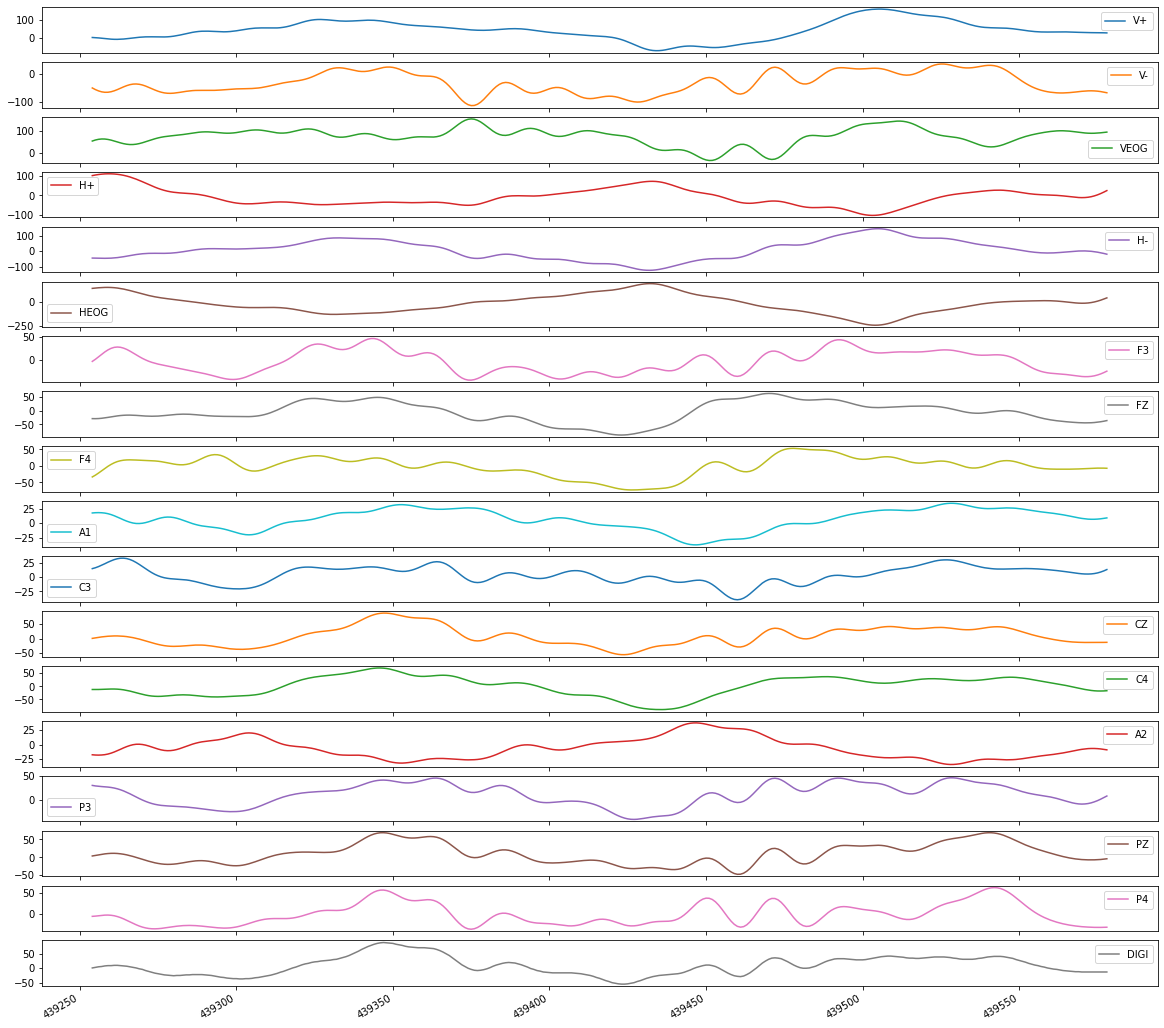

In [ ]:
import matplotlib.pyplot as plt
bc.plot(subplots = True ,layout = (18,1),figsize= (20,20))


,V+,V-,VEOG,H+,H-,HEOG,F3,FZ,F4,A1,C3,CZ,C4,A2,P3,PZ,P4,DIGI
439254,3.218651,-50.425529,53.715706,100.493431,-44.703484,145.268440,-2.932549,-29.325485,-33.617020,17.952919,15.234947,1.215935,-11.873245,-17.952919,30.469894,3.862381,-6.294250,1.0
439255,2.360344,-56.219101,58.579445,103.640556,-45.132637,148.773193,1.716614,-29.468536,-28.181076,18.382072,16.808510,3.004074,-11.944771,-18.382072,29.325485,5.292892,-5.722046,3.0
439256,0.929832,-60.868263,61.798096,106.072426,-45.633316,151.777267,7.009506,-29.039383,-21.743774,18.525124,18.882751,4.720688,-11.801720,-18.525124,28.538704,6.937981,-4.863739,5.0
439257,-0.858307,-64.158440,63.300133,107.932091,-46.062469,154.066086,12.445450,-28.038025,-14.877319,18.310547,21.314621,6.294250,-11.372566,-18.310547,27.966499,8.440018,-4.005432,6.0
439258,-2.717972,-65.732002,63.085556,109.148026,-46.277046,155.425072,17.666817,-26.607513,-7.939339,17.738342,23.889542,7.581711,-10.871887,-17.738342,27.465820,9.727478,-3.361702,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439574,29.253960,-60.868263,90.122223,-2.288818,-3.075600,0.715256,-34.403801,-43.487549,-7.081032,6.937981,6.508827,-12.874603,-16.808510,-6.937981,-4.792213,-6.937981,-32.687187,-13.0
439575,29.110909,-61.726570,90.909004,2.932549,-6.222725,9.155273,-32.615662,-42.271614,-6.866455,7.224083,7.581711,-12.803078,-17.523766,-7.224083,-2.217293,-6.580353,-32.758713,-13.0
439576,28.967857,-63.157082,92.124939,9.369850,-10.085106,19.383430,-30.326843,-40.698051,-6.794930,7.724762,9.155273,-12.731552,-17.666817,-7.724762,0.858307,-6.008148,-32.758713,-13.0
439577,28.610229,-65.088272,93.770027,16.665459,-14.519691,31.185150,-27.465820,-38.766861,-6.937981,8.440018,11.157990,-12.660027,-17.380714,-8.440018,4.220009,-5.149841,-32.615662,-13.0


In [ ]:
user_dict = {12: {'Category 1': {'att_1': 1, 'att_2': 'whatever'},
                  'Category 2': {'att_1': 23, 'att_2': 'another'}},
             15: {'Category 1': {'att_1': 10, 'att_2': 'foo'},
                  'Category 2': {'att_1': 30, 'att_2': 'bar'}}}

In [ ]:
user_ids = []
frames = []

for user_id, d in user_dict.items():
    user_ids.append(user_id)
    frames.append(pd.DataFrame.from_dict(d, orient='index'))

pd.concat(frames, keys=user_ids)


att_1     att_2
12 Category 1      1  whatever
   Category 2     23   another
15 Category 1     10       foo
   Category 2     30       bar

In [ ]:
for user_id, d in d.items():
  print(user_id)

Category 1
Category 2


In [ ]:

datafinal = []
target = []
target2 = []
real =  []
d_items =  d.items()
for key,value in d.items():
  #print(value)
  t = np.array(value)
  t = np.expand_dims(t, axis=0)

#Different Classes 
  if key[1] == 'u':
    k =  np.array([0])
  elif key[1] == 'r':
    k =  np.array([1])
  elif key[1] == 'm':
    k =  np.array([2])
  elif key[1] == 'b':
    k =  np.array([3])

#Two classes 
  if key[2] == 'g':
    to = np.array([1])
  else:
    to = np.array([0])

#List of classes 
  real.extend(key[1])
  target2.extend(k.tolist())
  target.extend(to.tolist())
  datafinal.extend(t.tolist())

  #print(t.shape)
  
f = np.array(datafinal)
f1 = np.array(target)
f2 = np.array(target2)

In [ ]:
dataf =  pd.DataFrame()

In [ ]:
animo =  pd.concat(d,axis=0)
base = pd.concat(d,axis = 0 )

In [ ]:
animo.index

MultiIndex([(  0, 'u', 'g',  0),
            (  0, 'u', 'g',  1),
            (  0, 'u', 'g',  2),
            (  0, 'u', 'g',  3),
            (  0, 'u', 'g',  4),
            (  0, 'u', 'g',  5),
            (  0, 'u', 'g',  6),
            (  0, 'u', 'g',  7),
            (  0, 'u', 'g',  8),
            (  0, 'u', 'g',  9),
            ...
            (809, 'b', 'w', 90),
            (809, 'b', 'w', 91),
            (809, 'b', 'w', 92),
            (809, 'b', 'w', 93),
            (809, 'b', 'w', 94),
            (809, 'b', 'w', 95),
            (809, 'b', 'w', 96),
            (809, 'b', 'w', 97),
            (809, 'b', 'w', 98),
            (809, 'b', 'w', 99)],
           length=364500)

In [ ]:

animo = animo.sort_index()

In [ ]:
animo.loc[0]

V+         V-       VEOG  ...         PZ        P4  DIGI
u g 0      0.000000   0.000000   0.000000  ...   0.000000  0.000000   0.0
    0      0.000000   0.000000   0.000000  ...   0.000000  0.000000   0.0
    1      0.000000   0.000000   0.000000  ...   0.000000  0.000000   0.0
    1      0.000000   0.000000   0.000000  ...   0.000000  0.000000   0.0
    2      0.000000   0.000000   0.000000  ...   0.000000  0.000000   0.0
...             ...        ...        ...  ...        ...       ...   ...
    2305  38.766861   8.726120  30.040741  ...  21.529198 -5.078316  32.0
    2306  39.482117  10.228157  29.253960  ...  21.672249 -4.863739  29.0
    2307  39.982796  11.157990  28.824806  ...  21.600723 -4.792213  27.0
    2308  40.268898  11.301041  29.039383  ...  21.457672 -4.792213  24.0
    2309  40.411949  10.585785  29.826164  ...  21.100044 -5.006790  21.0

[450 rows x 18 columns]

In [ ]:
dataf

NameError: ignored

In [ ]:
import numpy as np
import pandas as pd
ext = ['ms0', 'ms1', 'ms2']
node = ['supply', 'vdd', 'id0']
index = pd.MultiIndex.from_product([ext, node],names=('extension', 'nodes'))
df = pd.DataFrame(np.random.randn(9, 1), index=index)
df


0
extension nodes           
ms0       supply  0.760917
          vdd    -0.223483
          id0    -0.548100
ms1       supply -0.394042
          vdd     0.603695
          id0     0.401090
ms2       supply -0.435977
          vdd     0.863533
          id0    -0.788657

In [ ]:
animo = animo.sort_index()

In [ ]:
animo[[i for i in animo.index if [1] index    ]]

SyntaxError: ignored

In [ ]:
animo.index.names = ['Trial','']

FrozenList([None, None, None, None])

In [ ]:
data_you_need=pd.DataFrame()
data_you_need=data_you_need.append(animo,ignore_index=True)


In [ ]:
print(animo)
print(data_you_need)

In [ ]:
Tutal =  pd.DataFrame([real,target,target2])
print(Tutal.head())

In [ ]:
pd.set_option('max_rows',None)
pd.set_option('max_columns',None)


In [ ]:
time = np.arange(0,1800,4)
#df.insert(2, 'new-col', data)
test1 = test.insert(0,'Time',time) 


Create plots , and rounding the stamp location* Just to look one channel in gneeral  


Create plots from snippets 4x4 matrix

Create dummy datasets 

In [ ]:
#Vowel

vow = {}
for i in range(len(stamp)):
  #Multiply by the frequency to get the time 
  a = round(stamp.iloc[i]*250)
  # Minus 200 ms
  b = a - 50 
  # Plus 600 ms
  c = a + 150
  #Creating the frames 
  d[i,typ.iloc[i]] = dataset.iloc[b:c]

In [ ]:
#Lexicon
#no data is added
Lex = {}
for i in range(len(stamp)):
  #Multiply by the frequency to get the time 
  a = round(stamp.iloc[i]*250)
  # Minus 200 ms
  b = a - 50 
  # Plus 1600 ms
  c = a + 400
  #Creating the frames 
  lex[i,typ.iloc[i]] = dataset.iloc[b:c]

In [ ]:
# Using graph_objects
import plotly.graph_objects as go

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=test['Time'], y=test['V+'],
                    mode='lines',
                    name='lines'))
fig.add_trace(go.Scatter(x=test['Time'], y=test['V-'],
                    mode='lines+markers',
                    name='v-'))
fig.show()


In [ ]:
pip install plotly --upgrade


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(test["Time"], test["V+"])
plt.show()

In [ ]:
from matplotlib import pyplot

test.plot(subplots=True, legend=False)
pyplot.show()

In [ ]:
test.columns[1:]

In [ ]:
fig = px.line( x="Time", y= []
              hover_data={'Time'},
              title='custom tick labels')
fig.update_xaxes(
    dtick="M1")
fig.show()

In [ ]:
test.columns[1:]

In [ ]:
test.columns

In [ ]:
# How to run a Dash app in Google Colab

## Requirements

### Install ngrok
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

### Run ngrok to tunnel Dash app port 8050 to the outside world. 
### This command runs in the background.
get_ipython().system_raw('./ngrok http 8050 &')

### Get the public URL where you can access the Dash app. Copy this URL.
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

### Install Dash
!pip install dash==0.31.1  # The core dash backend
!pip install dash-html-components==0.13.2  # HTML components
!pip install dash-core-components==0.39.0  # Supercharged components
!pip install dash-table==3.1.7  # Interactive DataTable component (new!)

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

#df = px.data.stocks()
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

app.layout = html.Div([
    dcc.Dropdown(
        id="ticker",
        options=[{"label": x, "value": x} 
                 for x in test.columns[1:]],
        value=test.columns[1],
        clearable=False,
    ),
    dcc.Graph(id="time-series-chart"),
])

@app.callback(
    Output("time-series-chart", "figure"), 
    [Input("ticker", "value")])
def display_time_series(ticker):
    fig = px.line(test, x='Time', y=ticker)
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

In [ ]:
### Run Dash app
!python my_app1.py

In [ ]:
app.run_server(mode='external')

In [ ]:
# launch ngrok
get_ipython().system_raw('./ngrok http 8050 &')

In [ ]:
%%sh
# get url with ngrok
curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

In [ ]:
!python dash_app.py


# **DATA COMPRENHENSION**


---







1. TWEAKING THE DATASET
2. CUTTING OUTLIERS
3. NORMALIZING AND STANDARIZATION
4. BASELINE CORRECTION 







# Read from Drive

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.optim.lr_scheduler import _LRScheduler
from torch.utils.data import TensorDataset, DataLoader
import glob, os
from tqdm import tqdm
#State the main folder to read the files is located here
os.chdir(r"/content/drive/MyDrive/ResearchProject/Data")
#timeseries = glob.glob("*.txt")
#events = glob.glob("*.trg")


Mounted at /content/drive


# Read from Local Disk

In [ ]:
import pandas as pd
import numpy as np
import difflib as dif 
import glob, os
from tqdm import tqdm
#State the main folder to read the files is located here
os.chdir(r"C:\Users\demon\Documents\Maestria y Papeles Alemania\ResearchProject\datos\Data")
timeseries = glob.glob("*.txt")
events = glob.glob("*.trg")
import pandas as pd
import numpy as np
import difflib as dif 
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
import h5py
filename = "datafinal.h5"

with h5py.File(r"datafinal.h5", "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])


Keys: <KeysViewHDF5 ['EEG']>


In [ ]:

with h5py.File(r"multiclass.h5", "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    wayu = list(f[a_group_key])

Keys: <KeysViewHDF5 ['class']>


**Read the snippets files where they belong to**

In [ ]:
with open('snippetfiles.txt', 'rb') as fp:
    snames =  pickle.load(fp)
nameskeys = list(Counter(snames).keys()) # equals to list(set(words))
nameskeys = np.array(nameskeys)
snames = np.array(snames)

In [ ]:
print(nameskeys[0][1])
print(snames[1])
print(nameskeys.shape)
print(snames.shape)

0
c011_cnt.txt
(150,)
(109463,)


In [ ]:
print(data[0])
print(data[0].shape)


[[-30.326843 -27.751923   8.296967 ...   0.786781 -22.45903    7.867813]
 [-27.251244 -24.747849   9.942055 ...   1.859665 -18.596649   8.583069]
 [-24.104118 -22.315979  10.156631 ...   2.217293 -14.805794   9.298325]
 ...
 [  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]]
(450, 11)


In [ ]:
data = np.array(data,dtype = np.float32)
print(data.nbytes) 


2167367400


Cleaning from Outliers in a range from -500 500

In [ ]:
data = np.where(data > 1000, 1000, data)
data = np.where(data < -1000, -1000, data)

In [ ]:
print(data.shape)
print(data[0])

(109463, 450, 11)
[[-30.326843 -27.751923   8.296967 ...   0.786781 -22.45903    7.867813]
 [-27.251244 -24.747849   9.942055 ...   1.859665 -18.59665    8.583069]
 [-24.104118 -22.315979  10.156631 ...   2.217293 -14.805794   9.298325]
 ...
 [  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]]


In [ ]:
#REMEMBER YOU CAN CORRECT HOW TO REST THE MEAN JUST BY SLICING THE DATA[j] FRAME TO THE DETERMINE LENGHT

def Baseline(data,snames):
  
  for j in range(len(data)):
    
    dtreat = data[j]
    
    if snames[j][0] == 's':
      # -100 to 0 
      meand = np.mean(dtreat[25:75], axis =0)
      data[j][25:350] = dtreat[25:350] - meand
      #print('p')

    if snames[j][0] == 'c' and snames[j][1] == 's':
      meand = np.mean(dtreat[25:75], axis =0)
      data[j][25:350] = dtreat[25:350] - meand
      #print('u')

    if snames[j][0] == 'v':
      meand = np.mean(dtreat[:50], axis =0)
      data[j][:200] = dtreat[:200] - meand
      #print('0')
    
    if snames[j][0] == 'c' and snames[j][1] !='s':
      meand = np.mean(dtreat[:50], axis =0)
      data[j][:200] = dtreat[:200] - meand
      #print('y')

    if snames[j][0] == 'n':
      meand = np.mean(dtreat[:50], axis =0)
      data[j] = dtreat - meand
      #print('t')
  
  return data



In [ ]:
data = Baseline(data,snames)

In [ ]:
data[0]

array([[ -4.164217 , -16.516687 ,   8.651733 , ...,   6.2813754,
        -10.849001 ,  -6.6919327],
       [ -1.0886173, -13.512613 ,  10.296822 , ...,   7.3542595,
         -6.98662  ,  -5.976677 ],
       [  2.058508 , -11.080744 ,  10.511398 , ...,   7.7118874,
         -3.1957645,  -5.261421 ],
       ...,
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ]], dtype=float32)

In [ ]:
with h5py.File("dataBaselinecut1000.h5",'w') as f:
    # create a dataset for your movie
    dst = f.create_dataset("EEG", shape=(109463, 450, 11),
                           dtype=np.float32)
    # fill the 10 frames with a random image
    for frame in range(len(data)):
        dst[frame] = data[frame]

In [ ]:
#MixMaxScalerdataset Applying normalization througssnippets contained in one file 
def Scalingrange(dataset,snames):

  # Look for the files wiht the same names and how many files we have from each trial 
  nameskeys = list(Counter(snames).keys()) # equals to list(set(words))
  nameskeys = np.array(nameskeys)
  #scaler = MinMaxScaler(feature_range=(0,1000))
  scaler = StandardScaler()

  for j in range(len(nameskeys)):
    itemindexfile = np.where(snames ==  nameskeys[j])
    #Modify data[itemindexfiles]
    dtreatment = data[itemindexfile] 
    #Reshape it to flatten it correctly 
    dtreatment =  dtreatment.transpose(0,2,1)
    x, y, z    =  dtreatment.shape
    #Flattenworks from rigth to left flattening 
    dtreatment =  dtreatment.flatten()
    #Once flatten add a one dimension to pass it though the scaler
    dtreatment =  dtreatment.reshape(-1,1)
    dtreatment = scaler.fit_transform(dtreatment)
    dtreatment = np.asarray(np.reshape(dtreatment[:,0],(x,y,z)),dtype= np.float32)
    #Reshape as in the beginning
    dtreatment =  dtreatment.transpose(0,2,1)
    data[itemindexfile] = dtreatment
  
  return data  



In [ ]:
data = Scalingrange(data,snames)

In [ ]:
data.shape
print(data[0])

[[-0.06540165 -0.26336667  0.13999125 ...  0.10200307 -0.17253435
  -0.10591171]
 [-0.01611102 -0.21522233  0.16635601 ...  0.11919749 -0.11063447
  -0.09444877]
 [ 0.03432591 -0.17624834  0.16979489 ...  0.12492896 -0.0498809
  -0.08298583]
 ...
 [ 0.00133554  0.00133554  0.00133554 ...  0.00133554  0.00133554
   0.00133554]
 [ 0.00133554  0.00133554  0.00133554 ...  0.00133554  0.00133554
   0.00133554]
 [ 0.00133554  0.00133554  0.00133554 ...  0.00133554  0.00133554
   0.00133554]]


In [ ]:
with h5py.File("dataStandarScalecut1000.h5",'w') as f:
    # create a dataset for your movie
    dst = f.create_dataset("EEG", shape=(109463, 450, 11),
                           dtype=np.float32)
    # fill the 10 frames with a random image
    for frame in range(len(data)):
        dst[frame] = data[frame]


# Probe of the Normalization function

In [ ]:
dtreatment = data[itemindexfile] 
print(dtreatment.shape)
dtreatment =  dtreatment.transpose(0,2,1)
x, y, z    =  dtreatment.shape

(1200, 450, 11)


In [ ]:
dtreatmentf =  dtreatment.flatten()
print(dtreatmentf.shape)
print(dtreatment.shape)

(5940000,)
(1200, 11, 450)


In [ ]:
dtreatmentf = dtreatmentf.reshape(-1,1)
print(dtreatmentf.shape)

(5940000, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dtreatmentf = scaler.fit_transform(dtreatmentf)
dtreatmentf = np.asarray(np.reshape(dtreatmentf[:,0],(x,y,z)),dtype= np.float32)
print(dtreatmentf.shape)
#Reshape as in the beginning
dtreatmentf =  dtreatment.transpose(0,2,1)
print(dtreatmentf.shape)
#data[itemindexfile] = dtreatment

# num_instances, num_time_steps, num_features = data.shape
# data = np.reshape(data,(-1, num_features))
# print(data.shape)

(1200, 11, 450)
(1200, 450, 11)


In [ ]:
import numpy as np
array1 = np.array([[[5, 2, 2, 11100, 2, 15562, 245666],[3, 2, 2, 11100, 2, 15562, 245666]],[[5, 2, 2, 11100, 2, 15562, 245666],[3, 2, 2, 11100, 2, 15562, 245666]],[[5, 2, 2, 11100, 2, 15562, 245666],[3, 2, 2, 11100, 2, 15562, 245666]]])
#array1 = np.where(array1 > 10, 1, array1)
array2 = array1.flatten()
array3 = array1.flatten('C')

In [ ]:
print(array1)
print(array1.shape)
array2 =  array2.reshape(-1,1)

[[[     5      2      2  11100      2  15562 245666]
  [     3      2      2  11100      2  15562 245666]]

 [[     5      2      2  11100      2  15562 245666]
  [     3      2      2  11100      2  15562 245666]]

 [[     5      2      2  11100      2  15562 245666]
  [     3      2      2  11100      2  15562 245666]]]
(3, 2, 7)


In [ ]:
print(array2.shape)
print(array2[:,0].shape)


(42, 1)
(42,)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
array2 = scaler.fit_transform(array2)

In [ ]:
num_instances, num_time_steps, num_features = array1.shape
x1 = np.asarray(np.reshape(array2[:,0],(num_instances, num_time_steps, num_features)),dtype= np.float32)
print(x1.nbytes)


168


In [ ]:

print(x1)

In [ ]:
itemindexfile = np.where(snames ==  nameskeys[0])

# Baseline probe

this is to substract the base line part 


In [ ]:
trialmnean = np.mean(dtreat[25:50],axis = 0)
trialmnean.shape

(11,)

In [ ]:
if nameskeys[0][0] == 's':
  # -100 to 0 
  meand = np.mean(dtreat[25:50], axis =0)

if nameskeys[0][0] == 'c' and nameskeys[0][1] == 's':
  meand = np.mean(dtreat[25:50], axis =0)

if nameskeys[0][0] == 'v':
  meand = np.mean(dtreat[:50], axis =0)

if nameskeys[0][0] == 'n':
  meand = np.mean(dtreat[:50], axis =0)

if nameskeys[0][0] == 'c' and nameskeys[0][1] !='s':
  meand = np.mean(dtreat[:50], axis =0)


In [ ]:
meand = np.mean(dtreat[:100], axis =0)
print(meand)
print(meand.shape)

[-10.291817   -4.2357426   4.437446    4.6262736  -4.5490255   3.3917437
  -7.945775    2.8066645   5.785704    1.2645721  11.5606785]
(11,)


In [ ]:
dtreat

array([[-30.326843, -27.751923,   8.296967, ...,   0.786781, -22.45903 ,
          7.867813],
       [-27.251244, -24.747849,   9.942055, ...,   1.859665, -18.59665 ,
          8.583069],
       [-24.104118, -22.315979,  10.156631, ...,   2.217293, -14.805794,
          9.298325],
       ...,
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)

In [ ]:
dtreat  = dtreat-meand

In [ ]:
print(dtreat)

[[-20.035027  -23.51618     3.8595204 ...  -4.9989233 -23.723602
   -3.6928654]
 [-16.959427  -20.512106    5.5046086 ...  -3.9260392 -19.861221
   -2.9776096]
 [-13.812302  -18.080236    5.7191854 ...  -3.568411  -16.070366
   -2.262354 ]
 ...
 [ 10.291817    4.2357426  -4.437446  ...  -5.785704   -1.2645721
  -11.5606785]
 [ 10.291817    4.2357426  -4.437446  ...  -5.785704   -1.2645721
  -11.5606785]
 [ 10.291817    4.2357426  -4.437446  ...  -5.785704   -1.2645721
  -11.5606785]]


In [ ]:
print(dtreatment[0])

[[-30.326843 -27.751923   8.296967 ...   0.786781 -22.45903    7.867813]
 [-27.251244 -24.747849   9.942055 ...   1.859665 -18.59665    8.583069]
 [-24.104118 -22.315979  10.156631 ...   2.217293 -14.805794   9.298325]
 ...
 [  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.         0.         0.       ...   0.         0.         0.      ]]


In [ ]:
dtreatment[0] = dtreat

In [ ]:
dtreatment[0]

array([[-20.035027 , -23.51618  ,   3.8595204, ...,  -4.9989233,
        -23.723602 ,  -3.6928654],
       [-16.959427 , -20.512106 ,   5.5046086, ...,  -3.9260392,
        -19.861221 ,  -2.9776096],
       [-13.812302 , -18.080236 ,   5.7191854, ...,  -3.568411 ,
        -16.070366 ,  -2.262354 ],
       ...,
       [ 10.291817 ,   4.2357426,  -4.437446 , ...,  -5.785704 ,
         -1.2645721, -11.5606785],
       [ 10.291817 ,   4.2357426,  -4.437446 , ...,  -5.785704 ,
         -1.2645721, -11.5606785],
       [ 10.291817 ,   4.2357426,  -4.437446 , ...,  -5.785704 ,
         -1.2645721, -11.5606785]], dtype=float32)

# Plots

In [ ]:
z = data.mean(axis=1)
print(z.shape)
print(z)

(109463, 11)
[[ 0.05817368  0.00866168 -0.00898107 ...  0.10535517  0.02233033
  -0.03456915]
 [-0.22117566 -0.03189701 -0.0873547  ... -0.24610876 -0.01716055
   0.20538075]
 [-0.28834167 -0.16700688 -0.15687366 ...  0.261516   -0.2960804
  -0.0063675 ]
 ...
 [ 0.04556301  0.03346849 -0.01451016 ... -0.00391065 -0.17537399
  -0.18233448]
 [ 0.02007253  0.15345025  0.11616383 ...  0.11167494  0.00510548
  -0.1174363 ]
 [-0.10853473 -0.13025841 -0.13349606 ...  0.03799365 -0.0345772
  -0.08343799]]


In [ ]:
df = pd.DataFrame(z)
classes =  pd.DataFrame(wayu, columns=['class'])

In [ ]:
dataset = pd.concat([df,classes],axis = 1)
print(dataset)

               0         1         2         3         4         5         6  \
0       0.058174  0.008662 -0.008981 -0.009794 -0.136414  0.030612 -0.165585   
1      -0.221176 -0.031897 -0.087355 -0.091795  0.374884 -0.173097  0.549248   
2      -0.288342 -0.167007 -0.156874 -0.157793 -0.031456 -0.096782  0.066722   
3      -0.021881 -0.072596 -0.093990 -0.096630 -0.106745 -0.084945 -0.020411   
4       0.024524  0.068788  0.065518  0.066959  0.141242  0.068024  0.074454   
...          ...       ...       ...       ...       ...       ...       ...   
109458 -0.063168 -0.009453 -0.267158 -0.130826 -8.542213 -0.342023 -8.531696   
109459  0.020579 -0.033425  0.065563 -0.115736  7.808702  0.370410  7.756870   
109460  0.045563  0.033468 -0.014510  0.020272 -0.028096 -0.064974  0.025995   
109461  0.020073  0.153450  0.116164  0.150629  0.112680  0.292178 -0.190362   
109462 -0.108535 -0.130258 -0.133496 -0.123540 -0.069795 -0.045417 -0.035230   

               7         8         9   

In [ ]:
class0 = dataset[dataset['class'] == 0]
class1 = dataset[dataset['class'] == 1]
class2 = dataset[dataset['class'] == 2]
class3 = dataset[dataset['class'] == 3]

In [ ]:
class0 = class0.drop(columns=['class'])
class1 = class1.drop(columns=['class'])
class2 = class2.drop(columns=['class'])
class3 = class3.drop(columns=['class'])



In [ ]:
import matplotlib.pyplot as plt


10.689364
-4.6330833


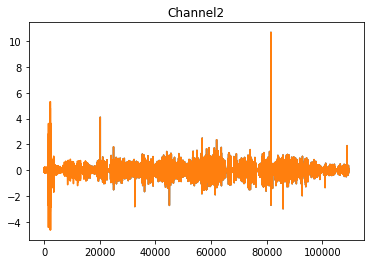

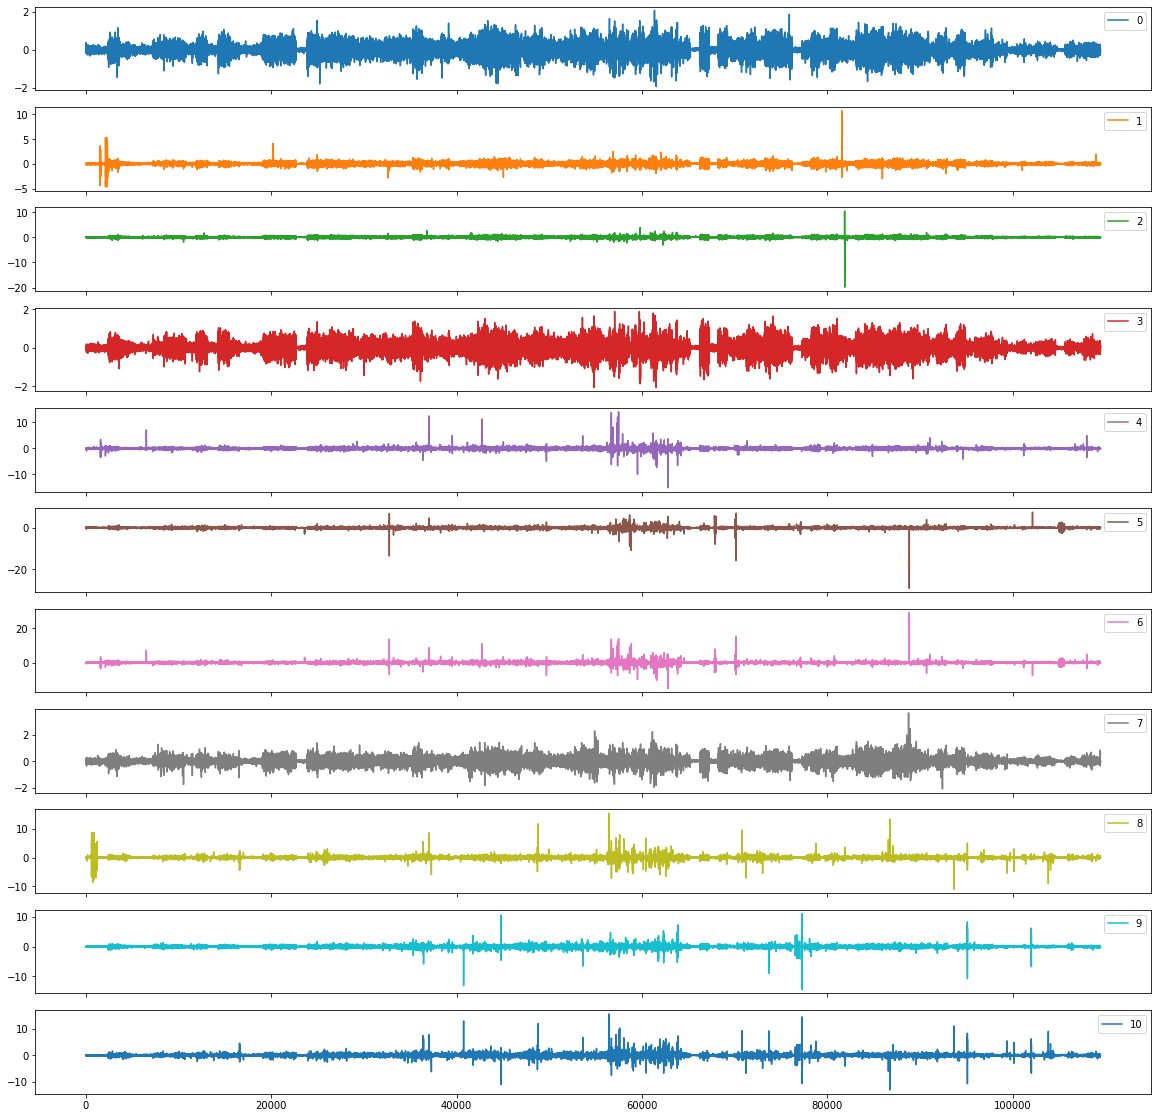

In [ ]:
class0[1].iloc[10000:].plot(title = 'Channel2cutted')

#plt.savefig('goodtrialseconchannelshortcut')
class0[1].plot(title = 'Channel2')
#plt.savefig('goodtrialseconchannelall')


class0.plot(subplots = True,layout = (11,1), figsize =  (20,20))
#plt.savefig('Class0')

print(class0[1].max())
print(class0[1].min())


array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

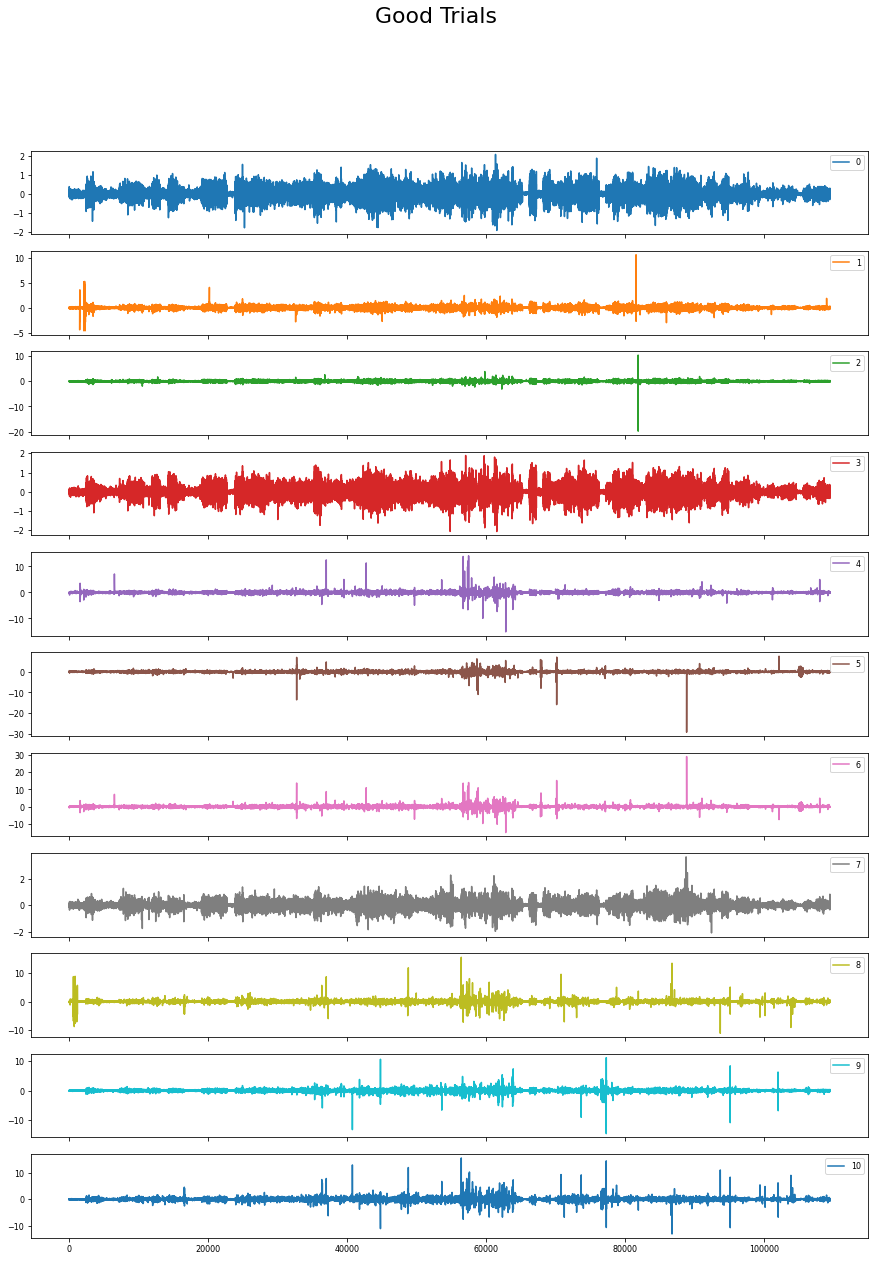

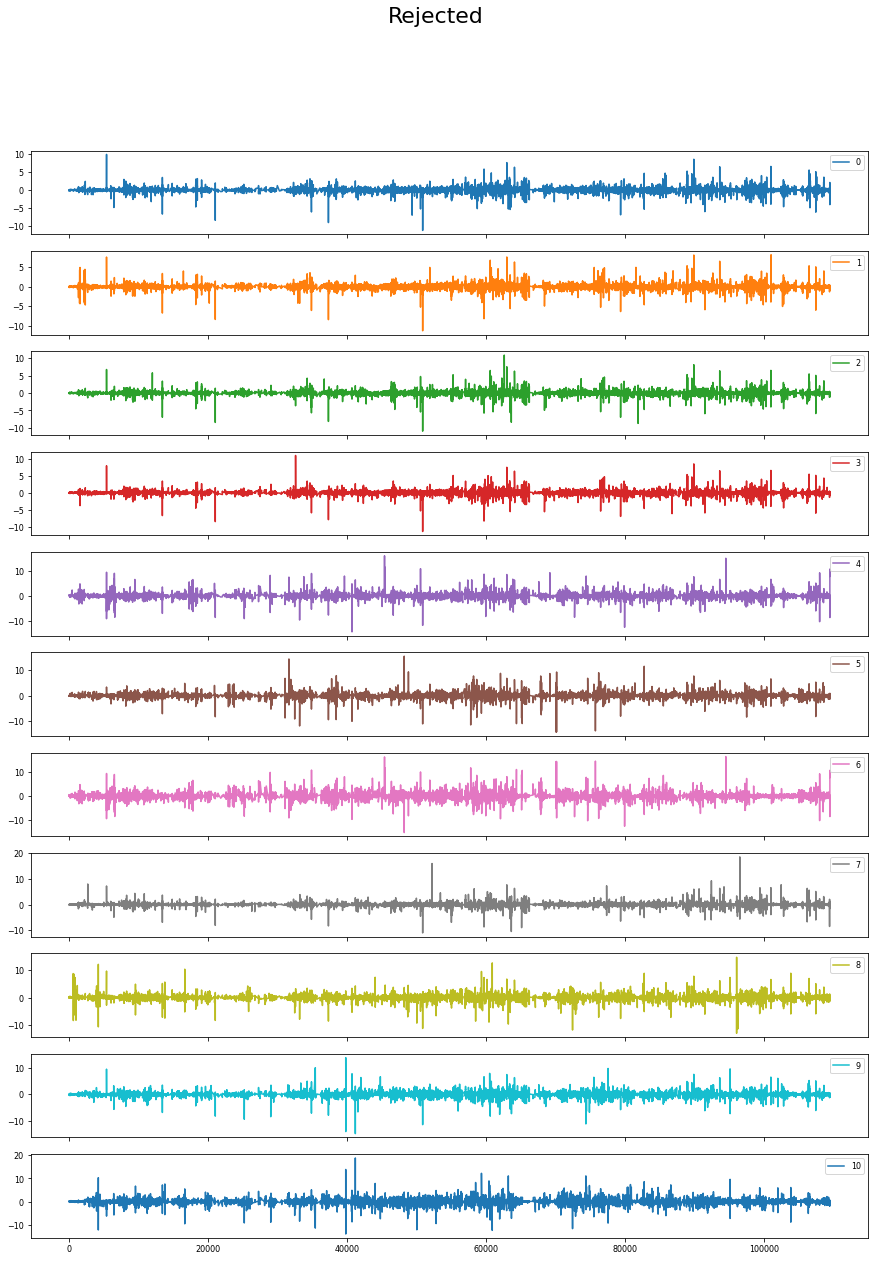

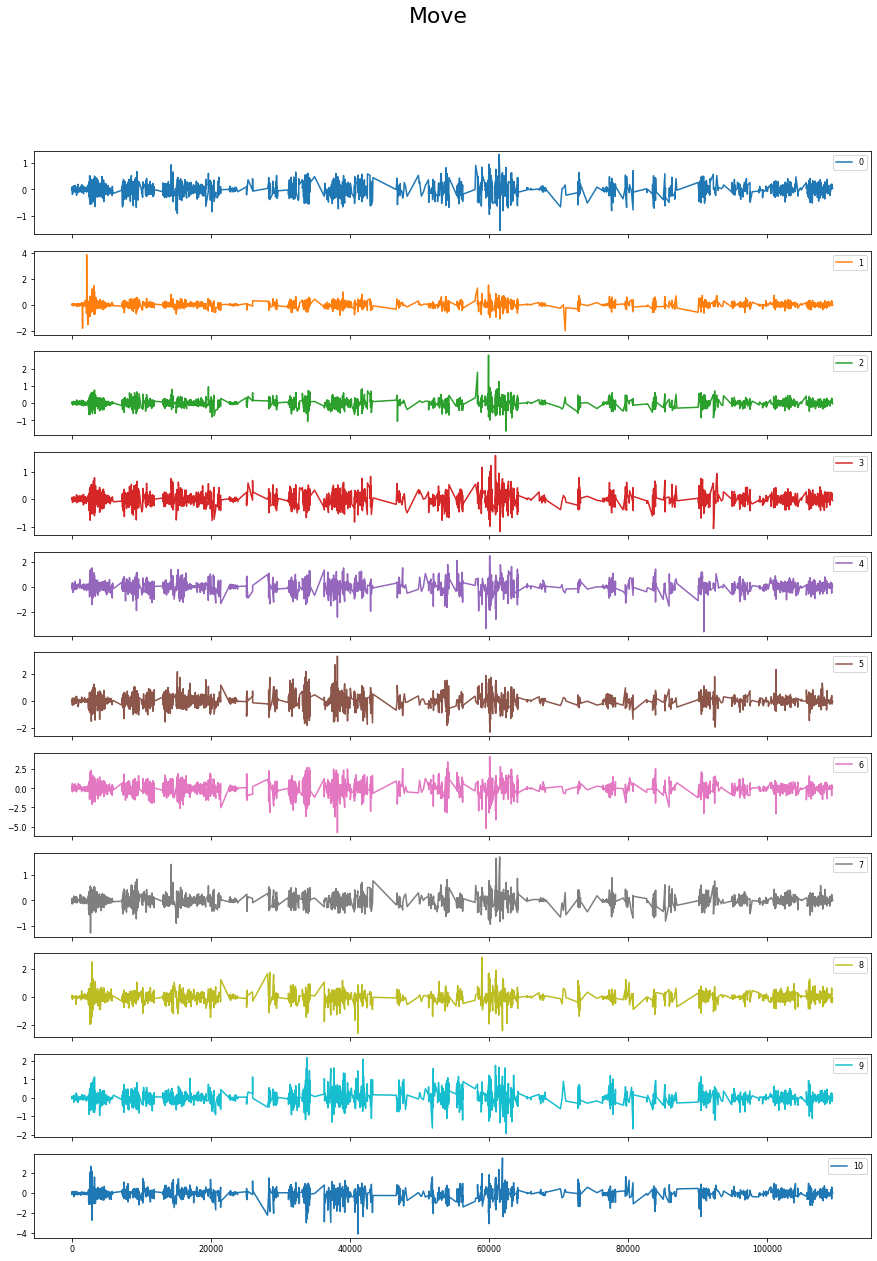

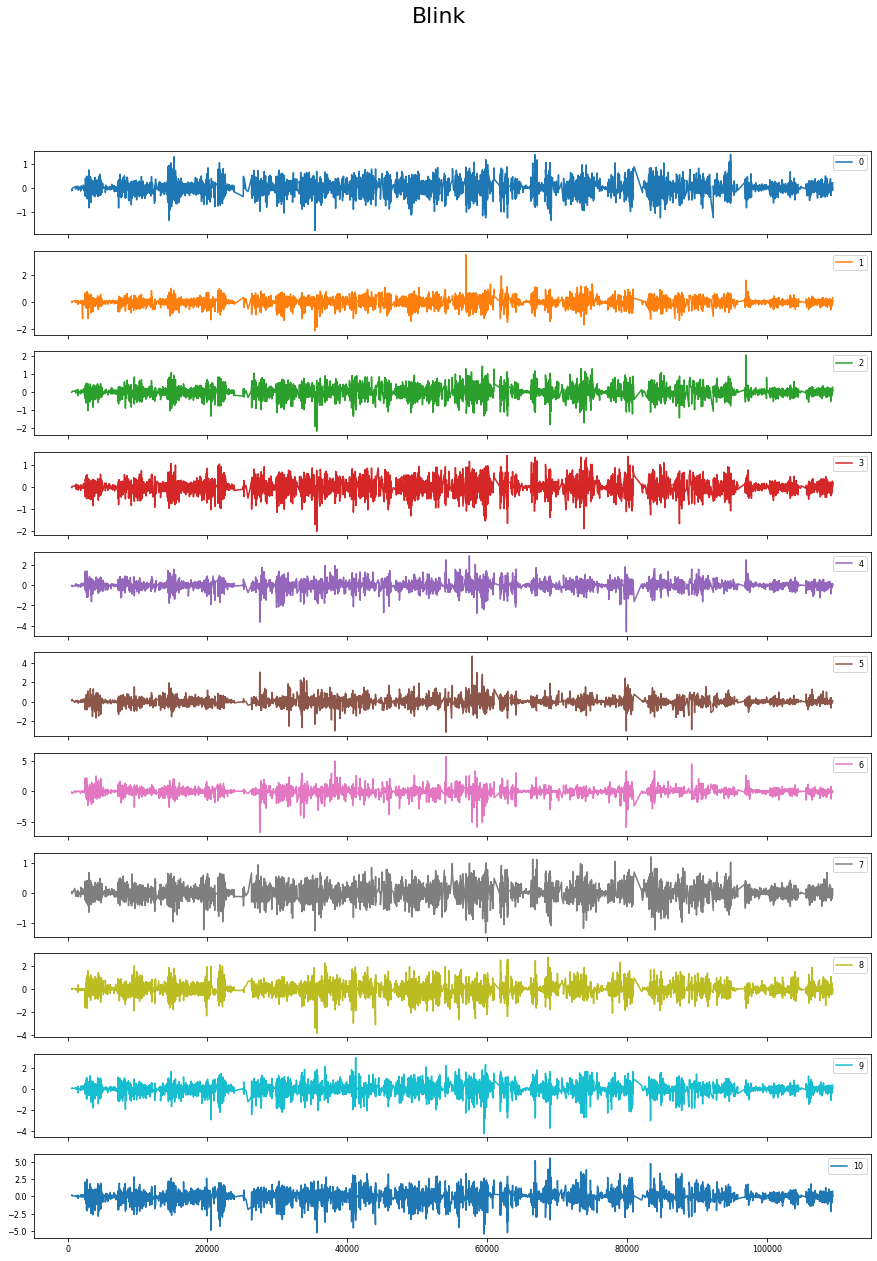

In [ ]:


SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title                
#print('UNCORRECTED or GOOD TRIALS')
class0.plot(subplots=True, layout=(11,1),figsize=(15,20),title = 'Good Trials')
#plt.savefig('Class0')

#ax.set_title('GOOD TRIALS',pad=20, fontdict={'fontsize':24})
#ax.suptitle('test title', fontsize=20)

# fig, ax = plt.subplots(11, 1, sharey=True)
# ax.plot(class0)
# ax1.set_title('Goods')


# print('REJECTED')
class1.plot(subplots=True, layout=(11,1),figsize=(15,20),title = 'Rejected')
#plt.savefig('Class1')
#print('MOVE')
class2.plot(subplots=True, layout=(11,1),figsize=(15,20),title = 'Move')
#plt.savefig('Class2')
# print('BLINK')
class3.plot(subplots=True, layout=(11,1),figsize=(15,20),title = 'Blink')
#plt.savefig('Class3')

array([[<AxesSubplot:title={'center':'0'}>],
       [<AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>],
       [<AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>],
       [<AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>]], dtype=object)

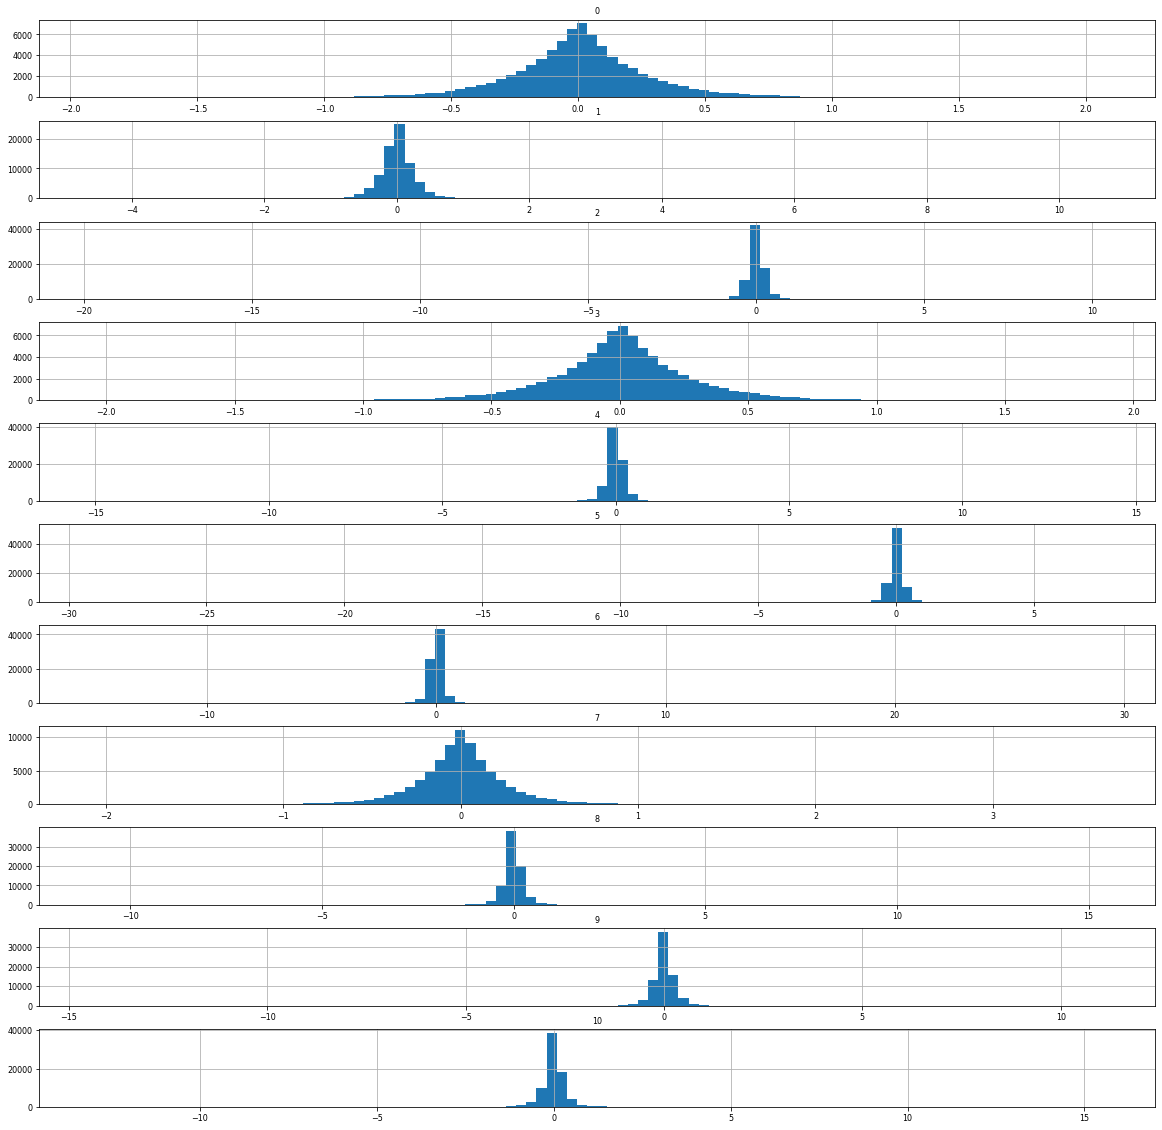

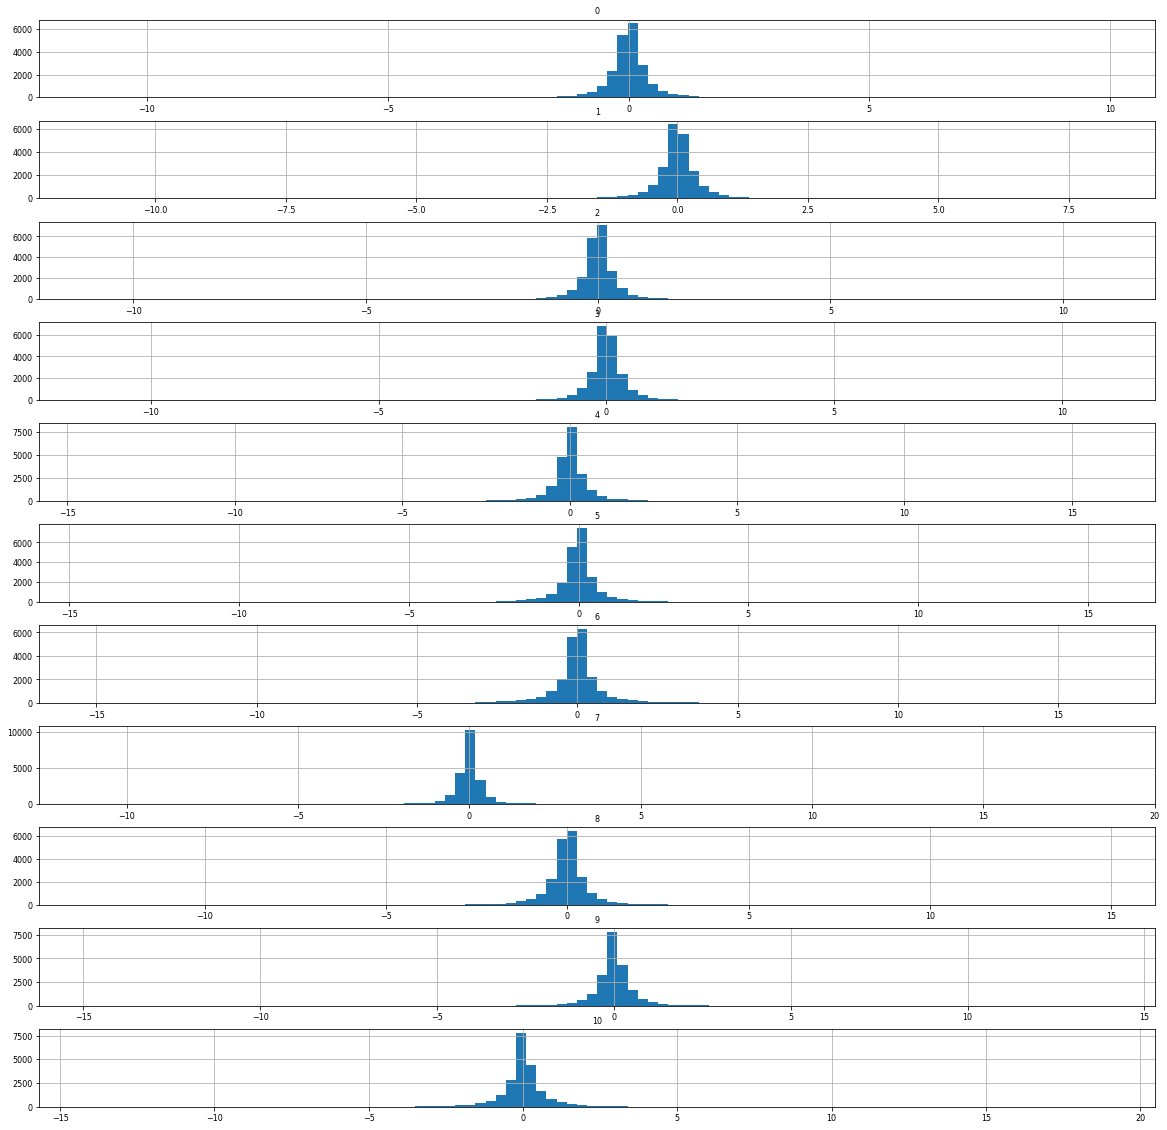

In [ ]:

class0.hist(bins = 100,layout=(11,1), figsize=(20,20))
class1.hist(bins = 100,layout=(11,1), figsize=(20,20))



In [ ]:
import numpy as np  

To apply the scaler for columns for me this is the right one 
Just by Snippet form [Pagina](https://stackoverflow.com/questions/50125844/how-to-standard-scale-a-3d-matrix/50134698)

In [ ]:
datas = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
np.random.seed(0)
datas = np.random.randint(0, 100, size=(3, 5, 2))
print(datas.shape)
print(datas[:,0,:])
# scalers = {}
# for i in range(data.shape[0]):
#     scalers[i] = StandardScaler()
#     X_train[:, i, :] = scalers[i].fit_transform(X_train[:, i, :]) 






#This slice cut through all the first channels 
# print(data[:,0,:])
# print(data)
scaler = MinMaxScaler()
datas[:,0,:] = scaler.fit_transform(datas[:,0,:])
print(datas[:,0,:].shape)
# print(scaler.fit(data))
# print(scaler.data_max_)
# print(scaler.transform(data))
# print(scaler.transform([[2, 2]]))
print(datas[-1])
datas = np.reshape(datas, datas[-1])

(3, 5, 2)
[[44 47]
 [70 88]
 [81 37]]
(3, 2)
[[ 1  0]
 [25 77]
 [72  9]
 [20 80]
 [69 79]]


In [ ]:
mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},
          {'a': 100, 'b': 200, 'c': 300, 'd': 400},
          {'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000 }]
df = pd.DataFrame(mydict)
print(df)
print(df.iloc[1:2])

      a     b     c     d
0     1     2     3     4
1   100   200   300   400
2  1000  2000  3000  4000
     a    b    c    d
1  100  200  300  400


Puting all the datasets stacked after each other 
[Pagina](https://stackoverflow.com/questions/53870113/using-standardscaler-on-3d-data)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = MinMaxScaler()
datas[:,0,:] = scaler.fit_transform(datas[:,0,:])
num_instances, num_time_steps, num_features = data.shape
data = np.reshape(data,(-1, num_features))
print(data.shape)
 

(49258350, 11)


In [ ]:
data = np.reshape(data, (num_instances, num_time_steps, num_features))

In [ ]:
print(data.shape)

(109463, 450, 11)


In [ ]:
import h5py

with h5py.File("datafinalminmaxscaler.h5",'w') as f:
    # create a dataset for your movie
    dst = f.create_dataset("EEG", shape=(109463, 450, 11),
                           dtype=np.float)
    # fill the 10 frames with a random image
    for frame in range(len(data)):
        dst[frame] = data[frame]

In [ ]:

z = pd.DataFrame(z)
z.hist(bins = 50,subplots = True)

In [ ]:
a = torch.tensor(data)

In [ ]:
print(a.shape)

In [ ]:
b = torch.mean(a,2)

In [ ]:
print(b.shape)

In [ ]:
a1 = torch.randn(10, 2,5)



In [ ]:
a2 = torch.mean(a1,1)
print(a2)
print(a2.shape)

In [ ]:
smean = []
for i in range(len(data)):
   mean = data.mean(axis=1)
   smean.extend(mean.tolist())
 